<a href="https://colab.research.google.com/github/krishjoshi7/krishjoshi7/blob/main/Neural_Network_Classification_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import tarfile

# Upload the .tgz file from your local machine
uploaded = files.upload()

# Specify the file name of the uploaded .tgz file
file_name = "/content/lenses (1).tgz"

# Extract the contents of the .tgz file
with tarfile.open(file_name, "r:gz") as tar:
    tar.extractall()

# Access and work with the extracted files as needed


Saving lenses.zip to lenses.zip


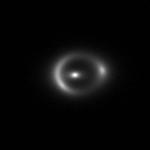

In [2]:
from PIL import Image
from IPython.display import display

# Open the image (replace 'image_path' with the actual path to your image)
image_path = '/content/lenses/no_sub/image_100108096845777232664144315147734473464.jpg'  # Replace with your image file path
image = Image.open(image_path)

# Display the image
display(image)


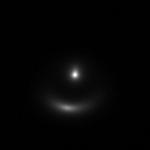

In [3]:
from PIL import Image
from IPython.display import display

# Open the image (replace 'image_path' with the actual path to your image)
image_path = '/content/lenses/no_sub/image_100640694369052181098601352008298802759.jpg'  # Replace with your image file path
image = Image.open(image_path)

# Display the image
display(image)

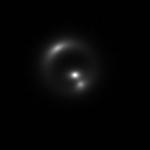

In [4]:
from PIL import Image
from IPython.display import display

# Open the image (replace 'image_path' with the actual path to your image)
image_path = '/content/lenses/sub/image_100019258133324150161414627571840489791.jpg'  # Replace with your image file path
image = Image.open(image_path)

# Display the image
display(image)

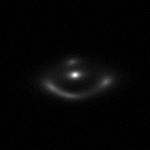

In [5]:
from PIL import Image
from IPython.display import display

# Open the image (replace 'image_path' with the actual path to your image)
image_path = '/content/lenses/sub/image_100320807541648655929202108326967225168.jpg'  # Replace with your image file path
image = Image.open(image_path)

# Display the image
display(image)

# Loading dependencies

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

generators :- It devide our data into batches (cause we cannot directly feed 10,000 or more images to our data) and we push one batch to our data

# Note
If using `validation_split` and shuffling the data, you must provide a `seed` argument, to make sure that there is no overlap between the training and validation subset.

In [7]:
# Set a random seed for reproducibility
seed = 42

# Load the dataset
dataset_1 = keras.utils.image_dataset_from_directory(
    directory = '/content/lenses',
    labels ='inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (224,224),
    shuffle = True,
    validation_split=0.2,  # Specify the validation split percentage
    seed=seed,  # Specify the random seed
    subset="training"  # Use "training" to get the training set
    )


# Create a validation dataset from the remaining data
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    directory='/content/lenses',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    validation_split=0.2,  # Specify the same validation split percentage
    seed=seed,  # Use the same random seed for consistency
    subset="validation"  # Use "validation" to get the validation set
)


Found 10000 files belonging to 2 classes.
Using 8000 files for training.
Found 10000 files belonging to 2 classes.
Using 2000 files for validation.


###Normalize the data

In [8]:
def process (image,label):
  image = tf.cast(image/223. ,tf.float32)
  return image,label

dataset_1 = dataset_1.map(process)

### Creating CNN Model

In [9]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(validation_dataset, epochs=10, validation_data= dataset_1)

Epoch 1/10
63/63 [==============================] - 23s 166ms/step - loss: 1.4254 - accuracy: 0.4900 - val_loss: 0.6931 - val_accuracy: 0.5025
Epoch 2/10
63/63 [==============================] - 9s 144ms/step - loss: 0.6878 - accuracy: 0.5320 - val_loss: 0.6931 - val_accuracy: 0.5025
Epoch 3/10
63/63 [==============================] - 9s 145ms/step - loss: 0.6902 - accuracy: 0.5365 - val_loss: 1.4681 - val_accuracy: 0.5025
Epoch 4/10
63/63 [==============================] - 9s 150ms/step - loss: 0.6432 - accuracy: 0.5885 - val_loss: 1.2809 - val_accuracy: 0.4975
Epoch 5/10
63/63 [==============================] - 10s 156ms/step - loss: 0.5493 - accuracy: 0.6680 - val_loss: 3.5482 - val_accuracy: 0.5025
Epoch 6/10
63/63 [==============================] - 13s 211ms/step - loss: 0.4769 - accuracy: 0.7160 - val_loss: 4.8294 - val_accuracy: 0.4975
Epoch 7/10
63/63 [==============================] - 10s 155ms/step - loss: 0.4101 - accuracy: 0.7790 - val_loss: 0.9397 - val_accuracy: 0.4970
Ep

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

1/1 [==============================] - 0s 80ms/step


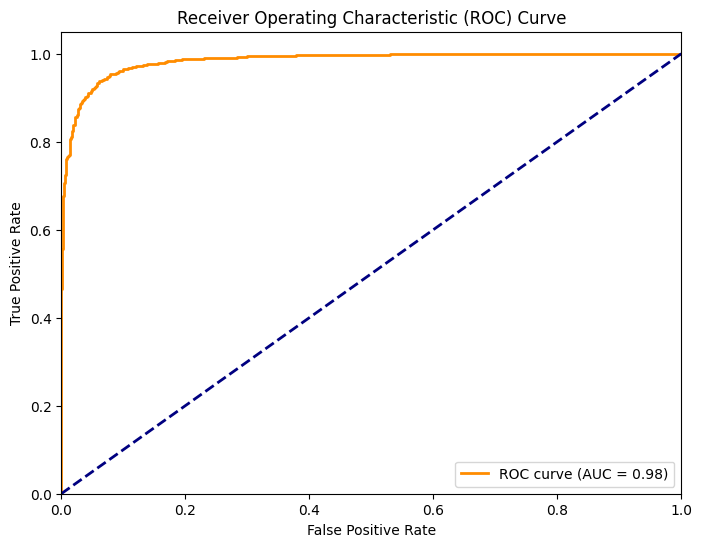

In [14]:
# Initialize an empty list to store true labels and predicted probabilities.
true_labels = []
predicted_probabilities = []

# Iterate through the validation dataset and make predictions.
for images, labels in validation_dataset:
    predictions = model.predict(images)
    true_labels.extend(labels.numpy())
    predicted_probabilities.extend(predictions)

# Convert the lists to NumPy arrays.
true_labels = np.array(true_labels)
predicted_probabilities = np.array(predicted_probabilities)

# Calculate the ROC curve and AUC.
fpr, tpr, _ = roc_curve(true_labels, predicted_probabilities)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [15]:
import numpy as np
from sklearn.metrics import f1_score

# Assuming you have true labels and predicted labels for the validation dataset
# You can extract them from the validation_dataset you created earlier
y_true = []
y_pred = []

for images, labels in validation_dataset:
    y_true.extend(labels.numpy())
    # Replace 'model.predict(images)' with the actual prediction from your trained model
    y_pred.extend(np.round(model.predict(images)).flatten())

# Convert the lists to NumPy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Calculate the F1-score
f1 = f1_score(y_true, y_pred)

# Print the F1-score
print("F1-Score:", f1)



1/1 [==============================] - 0s 28ms/step
F1-Score: 0.9379310344827586
